---
title: "Introducción al Muestreo"
---

Aprende qué es el muestreo y por qué es tan poderoso. También aprenderás sobre los problemas causados por el muestreo de conveniencia y las diferencias entre la verdadera aleatoriedad y la pseudoaleatoriedad.

## Muestreo y estimaciones puntuales

La técnica de trabajar con un subconjunto de toda la población se le llama muestreo.

-   Población vs Muestreo La población es el conjunto completo de datos que nos interesan.
    -   No se refiere a personas.
    -   Típicamente, no sabremos cómo es toda la población.

La muestra es el subconjunto de datos con el que estamos trabajando.

-   Coffee rating dataset

    ![](images/paste-1.png)

    -   Cada fila representa 1 café.
    -   Hay 1338 filas
    -   Al café se le asigna una puntuación de cero a cien, que se almacena en la columna `total_cup_points`.
    -   Otras columnas contienen información contextual como la variedad y el país de origen.
    -   Puntuaciones entre 0 y 10 para atributos del café como el aroma y el cuerpo.
    -   No contiene todos los cafés del mundo, por lo que no sabemos exactamente cuál es la población de cafés.
    -   Hay suficientes para considerarla como la población de interés.

-   Points vs. Flavor: Población

In [1]:
#| echo: true
#| eval: false
pts_vs_flavor_pop = coffee_ratings[["total_points", "flavor"]]

![](images/paste-2.png)

-   Points vs. Flavor: 10 filas de muestra

In [2]:
#| echo: true
#| eval: false
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)

![](images/paste-3.png)

El método `.sample()` de pandas devuelve un subconjunto aleatorio de filas. Establecer n en 10 significa que devuelve 10 filas aleatorias. En la muestra aparecen 10 muestras únicas.

-   Muestreo en Python para Series

    -   Use `.sample()` en `pandas` para DataFrames y Series.

In [3]:
#| echo: true
#| eval: false
cup_points_samp = coffe_ratings['total_cup_points'].sample(n=10)

![](images/paste-4.png)

-   Parámetros de Población & Puntos Estimados

    Un parámetro de población es un cálculo realizado sobre el conjunto de datos de población.

In [4]:
#| echo: true
#| eval: false
import numpy as np
np.mean(pts_vs_flavor_pop['total_cup_points'])

![](images/paste-5.png)

Una estimación puntual o estadística de muestra, es un cálculo basado en el conjunto de datos de muestra.

In [5]:
#| echo: true
#| eval: false
np.mean(cup_points_samp)

![](images/paste-6.png)

-   Puntos estimados con pandas

    Trabajar con pandas puede ser más fácil que trabajar con Numpy. Estos cálculos de media se pueden realizar utilizando el método de pandas `.mean()`

In [6]:
#| echo: true
#| eval: false
pts_vs_flavor_pop['flavor'].mean()

![](images/paste-7.png)

In [7]:
#| echo: true
#| eval: false
pts_vs_flavor_samp['flavor'].mean()

![](images/paste-8.png)

### Motivos del muestreo

El muestreo es una técnica importante en tu arsenal estadísico. Sin embargo, no siempre es adecuado: hay que saber cuándo utilizarlo y cuándo trabajar con todo el conjunto de datos.

¿Cuál de los siguientes no es un buen escenario para utilizar el muestreo?

**Respuestas posibles**

-   [ ] Te han agregado un terabyte de datos sobre registros de errores del dispositivo de tu empresa.
-   [ ] Deseas conocer los hábitos de viaje de todos los ciudadanos adultos paquistaníes.
-   [x] Has terminado de recoger los datos de un pequeño estudio sobre las medidas de las alas de 10 mariposas.
-   [ ] Has estado trabajando para predecir la rotación de clientes en un proyecto de big data para tu empresa de marketing.

Diez mariposas es un conjunto de datos pequeño, por lo que el muestreo no es útil aquí.

### Muestreo simple con pandas

A lo largo de este capítulo , explorarás los datos de canciones de Spotify. Cada fila de este conjunto de datos de población representa una canción, y hay más de 40000 filas. Las columnas incluyen el nombre de la canción, los artistas que la interpretaron, al año de lanzamiento y atributos de la canción como su duración, tempo y bailabilidad. Empezarás por fijarte en las duraciones.

Tu primera tarea es tomar una muestra del conjunto de datos de Spotify y comparar la duración media de la población con la de la muestra.

In [8]:
import pandas as pd
ruta = './data/spotify_2000_2020.feather'
spotify_population = pd.read_feather(ruta)
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


#### Instrucciones

1.  Muestra 1000 filas de `spotify_population`, asignándolas a `spotify_sample`.

In [9]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# print sample
print(spotify_sample)

       acousticness                     artists  danceability  duration_ms  \
14790      0.129000          ['Living Legends']         0.804     269360.0   
30612      0.003080                 ['Beyoncé']         0.512     257653.0   
12637      0.036800                  ['Juanes']         0.711     294267.0   
6945       0.008780          ['Camera Obscura']         0.329     231160.0   
3306       0.344000  ['Thalía', 'Prince Royce']         0.800     220067.0   
...             ...                         ...           ...          ...   
34620      0.000637                ['Maroon 5']         0.674     185280.0   
2342       0.361000      ['Conjunto Primavera']         0.642     221627.0   
12414      0.992000          ['Clifford Solum']         0.196     191250.0   
10630      0.619000    ['Los Reyes Del Camino']         0.666     229067.0   
35407      0.121000                 ['Kehlani']         0.426     185884.0   

       duration_minutes  energy  explicit                      

2.  

-   Calcula la duración media en minutos de `spotify_population` utilizando `pandas`.
-   Calcula la duración media en minutos de `spotify_sample` utilizando `pandas`.

In [10]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_sample = spotify_sample['duration_minutes'].mean()

# print the means
print(mean_dur_pop)
print(mean_dur_sample)

3.8521519140900073
3.919023916666667


Se observa que la duración media de las canciones en la muestra es similar, pero no idéntica a la duración media de las canciones en toda la poblacición.

### Muestreos y cálculos sencillos con Numpy

También puedes utilizar `numpy` para calcular parámetros o estadísticas partir de una lista o de la serie `pandas`.

### Instrucciones

1.  

-   Crea una serie `pandas`, `loudness_pop`, subdividiendo la columna `loudness` de `spotify_population`.
-   Muestra `loudness_pop` para obtener 100 valores aleatorios, asignándolos a `loudness_samp`.

In [11]:
# Create a pandas Series from de loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

print(loudness_samp)

14494   -15.592
21742    -5.908
7544     -3.933
6903     -9.011
6737    -22.912
          ...  
29413    -3.546
31459    -3.048
6680     -7.488
32       -8.924
2110     -6.909
Name: loudness, Length: 100, dtype: float64


2.  

-   Calcula la media de `loudness_pop` utilizando `numpy`.
-   Calcula la media de `loudness_samp` utilizando `numpy`.

In [12]:
import numpy as np

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.88211


Nuevamente, observe que el valor calculado (la media) es cercano pero no idéntico en cada caso.

## Muestreo de conveniencia

Antes del realizar el muestreo, debemos pensar en nuestro proceso de recopilación de datos para evitar resultados sesgados.

-   Muestra por conveniencia en coffee ratings

Observemos el parámetro de población de puntos de taza promedio

In [13]:
#| echo: true
#| eval: false
coffee_ratings['total_cup_points'].mean()

![](images/paste-9.png)

Una forma de muestreo por conveniencia sería tomar las primeras 10 filas en lugar de muestras aleatorias. Las primeras 10 filas se pueden traer con el método `.head()`

In [14]:
#| echo: true
#| eval: false
coffee_ratings_first10 = coffee_ratings.head(10)

In [15]:
#| echo: true
#| eval: false
coffee_ratings['total_cup_points'].mean()

![](images/paste-10.png)

La media de puntos de taza de muestra, es superior.

En este caso, la muestra por conveniencia no es representativa de toda la población.

-   Visualización del sesgo de selección

Los histogramas son una excelente manera de visualizar el sesgo de selección.

In [16]:
#| echo: true
#| eval: false
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

A continuación se muestra el código para generar un histograma de la muestra de conveniencia:

In [17]:
#| echo: true
#| eval: false
coffee_ratings_first10['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

-   Distribución de una población y de una muestra por conveniencia

![](images/paste-11.png)

Queda claro que la distribuicón de la muestra no es similar a la de la población. Todos los valores de la muestra están al lado derecho del gráfico.

-   Visualizando el sesgo de selección para una muestra aleatoria

In [18]:
#| echo: true
#| eval: false
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

-   Distribución de una población y de una simple muestra aleatoria

![](images/paste-12.png)

Se observa que la forma de las distribuciones está más alineada cuando se utiliza un muestreo aleatorio.

### ¿Son generalizables las conclusiones de la muestra?

Acabas de ver cómo el muestreo por conveniencia (recoger muestras utilizando el método más fácil) puede dar lugar a muestras que no son representativas de la población. Equivalentemente, esto significa que las conclusiones de la muestra no son generalizables a la población. Visualizar las distribuciones de la población y la muestra puede ayudar a determinar si la muestra es o no representativa de la población.

El conjunto de datos de Spotify tiene una columna `acousticness`, que es una medida de confianza de cero a uno de si la canción se hizo con instrumentos que no están enchufados. Compararás la distribución `acousticness` de la población total de canciones con una muestra de esas canciones.


#### Intrucciones

1. Traza un histograma de `acousticness` de `spotify_population` con contenedores con anchura `0.01` de `0` a `1` utilizando pandas `.hist()`.

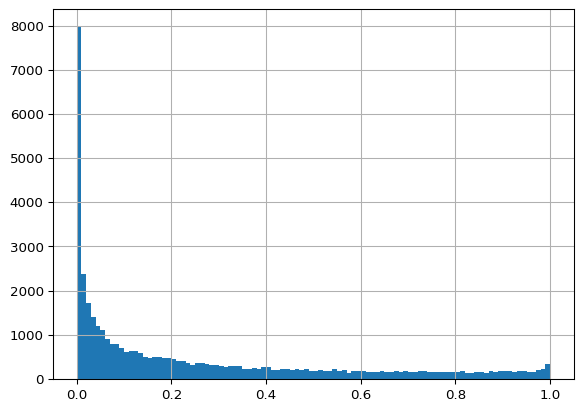

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualize the distribution of acoustiness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

2. Actualliza el código del histograma para utilizar el conjunto de datos `spotify_mysterious_sample`.

::: {.callout-note collapse="true"}
Para poder obtener el conjunto de datos `spotify_mysterious_sample` copie los datos desde Datacmap usando el comando:

In [20]:
#| echo: true
#| eval: false
print(spotify_population.to_csv(index=False))

:::

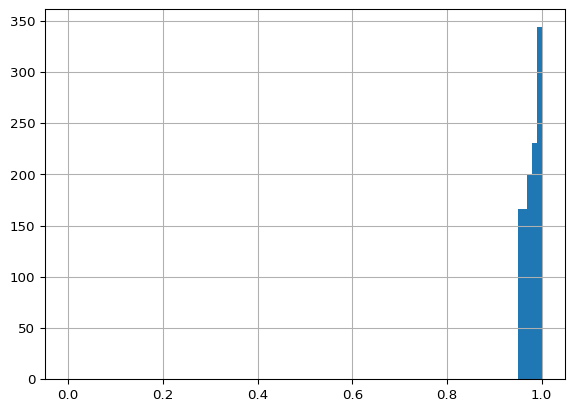

In [21]:
ruta = './data/spotify_mysterious_sample.csv'
spotify_mysterious_sample = pd.read_csv(ruta)

# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

3. **Preguntas**

Compara los dos histogramas que has dibujado ¿Los valores de `acousticness` de la muestra son generalizables a la población en general?

**Respuestas Posibles**

- [ ] Sí. Cualquier muestra debe conducir a un resultado generalizable sobre la población.
- [ ] Sí. Es probable que la muestra seleccionada sea una muestra aleatoria de todas las canciones de la pblación.
- [ ] No. Las muestras nunca pueden conducir a resultados generalizables sobre la población.
- [X] No. Las muestras de `acousticness` son sistemáticamenre superiores a las de la población general.
- [ ] No. Las muestras de `acousticness` son sistemáticamente inferiores a las de la pobleción general.

### ¿Son generalizables estos resultados?

## Generación de números pseudoaleatorios

### Generar números aleatorios

### Comprender los valores de iniciaclización aleatorios